#### CONCEPT: Check, over various rolling windows, the feasibility of the assets for the Markowitz portfolio.


1. Plot the areas where the returns of each asset over a 40-day rolling window surpass a risk-free rate of "0"

2. Select assets that do "decently" on that test. Plot random samples of 5, and show where their covariance matrix is non-singular

3. Try to run the max-sharpe portfolio optimization, on our five favorite assets. Save those weights to a CSV, for 30-day, 60-day, and 100-day rolling windows.


C:\Users\ic2594\AppData\Local\Temp\ipykernel_6224\1517198571.py:55: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=pd.to_datetime(start_time, unit='us'),


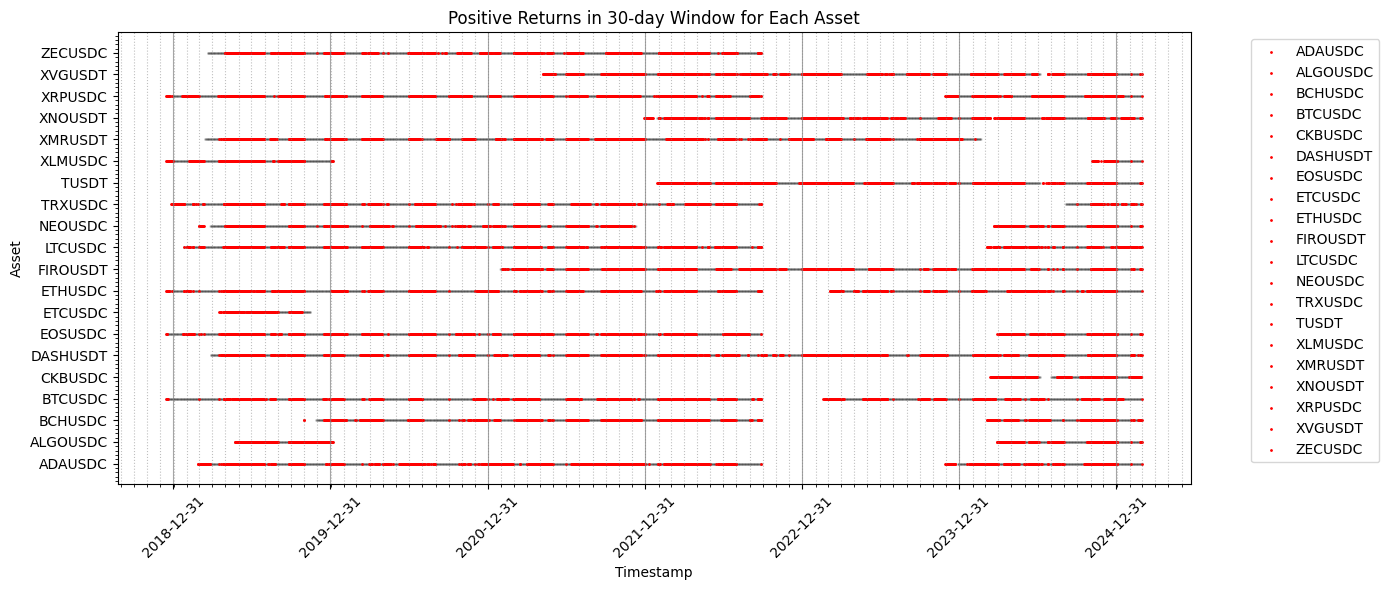

In [10]:
%store -r tickers

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
start_time = np.inf
end_time = 0
for ticker in tickers:
    df = pd.read_csv(f"assets/{ticker}.csv")
    earliest_time = df['Open time'].min()
    latest_time = df['Open time'].max()
    start_time = min(start_time, earliest_time)
    end_time = max(end_time, latest_time)




window_size = 30
time_range = pd.date_range(start=pd.to_datetime(start_time, unit='us'), 
                            end=pd.to_datetime(end_time, unit='us'), freq='D')

results = {}
for ticker in tickers:
    df = pd.read_csv(f"assets/{ticker}.csv")
    df['Open time'] = pd.to_datetime(df['Open time'], unit='us')


    asset_times = df['Open time']
    asset_times = pd.Series(asset_times).dt.floor('D').drop_duplicates().tolist()
    plt.scatter(asset_times, [ticker] * len(asset_times), color='black', alpha=0.1, s=1)

    df.set_index('Open time', inplace=True)
    df['pct_change'] = df['Open'].pct_change()


    results[ticker] = []
    for start in time_range:
        end = start + pd.Timedelta(days=window_size)
        window_data = df.reindex(pd.date_range(start=start, end=end, freq='30min'), fill_value=np.nan).loc[start:end]
        results[ticker].append({ 'time_range': (start, end), 'mean': window_data['pct_change'].mean()})



for ticker in tickers:
    asset_times = []
    for result in results[ticker]:
        if result['mean'] > 0:
            asset_times.append(result['time_range'][0])
    plt.scatter(asset_times, [ticker] * len(asset_times), label=ticker, color='red', s=1)

plt.xlabel("Timestamp")
plt.ylabel("Asset")
plt.title("Positive Returns in 30-day Window for Each Asset")
plt.grid(axis='x', which='major', linestyle='-', color='gray', alpha=0.7)
plt.xticks(pd.date_range(start=pd.to_datetime(start_time, unit='us'), 
                         end=pd.to_datetime(end_time, unit='us'), 
                         freq='Y'), rotation=45)
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.5)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("1_positive-returns.png")
plt.show()